<a href="https://colab.research.google.com/github/igoorsa/MachineLearning/blob/main/Randomized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [5]:
#columns = ['Serial', 'Score1', 'Score2', 'RatingUni', 'SOP', 'LOR', 'CGPA', 'Research', 'Admit']
dados = pd.read_csv('/content/Admission_Predict.csv')
#dados = dados.drop([0], axis=0)
dados.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
dados.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

<Axes: >

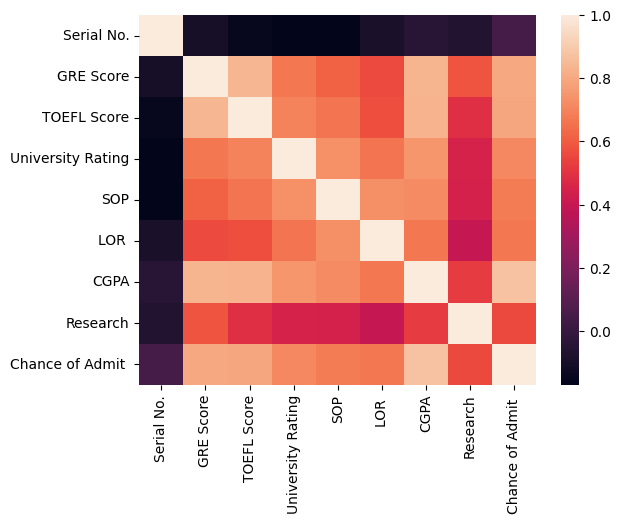

In [7]:
sns.heatmap(dados.corr())

In [8]:
dados = dados.drop('Serial No.', axis = True)
x = dados.drop('Chance of Admit ', axis = 1)
y = dados['Chance of Admit ']

In [9]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size = 0.3, random_state = 12)

In [10]:
x_treino.shape, y_treino.shape

((280, 7), (280,))

In [11]:
from sklearn.utils import shuffle
def VerficarMelhorModelo(x,y):
  ModeloLinear = LinearRegression()
  ModeloLasso = Lasso()
  ModeloRidge = Ridge()
  ModeloElastic = ElasticNet()

  kfold = KFold(10,shuffle=False)
  res_Linear = cross_val_score(ModeloLinear, x,y, cv=kfold).mean()
  res_Lasso = cross_val_score(ModeloLasso, x,y, cv=kfold).mean()
  res_Ridge = cross_val_score(ModeloRidge, x,y, cv=kfold).mean()
  res_Elastic = cross_val_score(ModeloElastic, x,y, cv=kfold).mean()

  dicResultado = {'Linear':res_Linear, 'Lasso':res_Lasso, 'Ridge':res_Ridge,
                  'Elastic':res_Elastic}
  melhor = max(dicResultado)
  print(f'O melhor resultado foi: {melhor}, com uma taxa média de: {dicResultado[melhor]*100:.2f}%')

In [12]:
VerficarMelhorModelo(x,y)

O melhor resultado foi: Ridge, com uma taxa média de: 77.06%


Baseado no Cross Validation, irei usar o modelo Ridge

In [23]:
valores = {'alpha':[0.1,0.2,0.5,1,2,3,5,7,8,9,10,14,16,20,22,25,26,27]}
modelo = Ridge()
parametros = RandomizedSearchCV(modelo, valores, n_iter = 120,cv= 5)
parametros.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 18 is smaller than n_iter=120. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=120,
                   param_distributions={'alpha': [0.1, 0.2, 0.5, 1, 2, 3, 5, 7,
                                                  8, 9, 10, 14, 16, 20, 22, 25,
                                                  26, 27]})

In [24]:
print('melhor alpha:', parametros.best_estimator_.alpha)
print('melhor score:', parametros.best_score_)

melhor alpha: 0.1
melhor score: 0.7711588368375348
